# **Classificação de textos do Twitter com spaCy**

### Etapa 1: Bibliotecas

In [1]:
# Libs
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
import re
spacy.__version__

'2.2.3'

### Etapa 2: Carregamento da Base de dados

In [2]:
# dados
bd = pd.read_csv('./data/base_treinamento.txt', encoding='utf8')
bd.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [3]:
# tamanho da base de dados 
bd.shape

(196, 2)

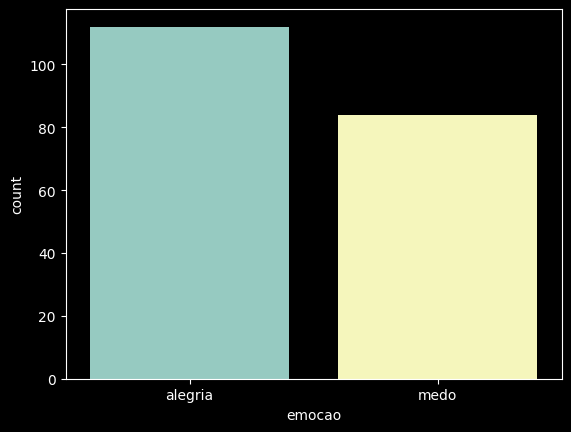

In [4]:
# gráficos de emoções 
sns.countplot(x=bd['emocao'], label='Contagem');

### Etapa 3: Função para pré-processamento dos textos

In [5]:
# Variável para remover pontuações 
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
# Variável para remover as stop_words
from spacy.lang.pt.stop_words import STOP_WORDS

stop_words = STOP_WORDS
len(stop_words)

413

In [7]:
# Carregando o spacy
spacy.prefer_gpu()
pln = spacy.load("pt_core_news_sm")
pln

In [8]:
# Criação da função de processamento 
def preprocessamento(texto):
    # Letras minúsculas
    texto = texto.lower()

    # Nome do usuário
    texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto)

    # URLs
    texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)

    # Espaços em branco
    texto = re.sub(r" +", ' ', texto)

    # Emoticons
    lista_emocoes = {':)': 'emocaopositiva',
                    ':d': 'emocaopositiva',
                    ':(': 'emocaonegativa'}
    for emocao in lista_emocoes:
        texto = texto.replace(emocao, lista_emocoes[emocao])

    # Lematização
    documento = pln(texto)

    lista = []
    for token in documento:
        lista.append(token.lemma_)
    
    # Stop words e pontuações
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
    
    return lista

In [9]:
# testando a função
texto_teste = '@behin_d_curtain :D Para :( mim, http://www.iaexpert.com.br é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'
resultado = preprocessamento(texto_teste)
resultado

'  emocaopositiva parir emocaonegativa mim precisamente o contrário emocaopositiva vir o chuva e vir o disposição emocaopositiva'

### Base de Teste

In [10]:
# Base de teste
bd_test = pd.read_csv('./data/base_teste.txt', encoding='utf8')
bd_test.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


### Etapa 4: Pré-processamento da base de dados

In [11]:
# Limpeza de dado
bd.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [12]:
# Limpeza
bd['texto'] = bd['texto'].apply(preprocessamento)
bd.head(10)

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar o aconchegar,alegria
2,o adesão o o cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria
5,adorar cabelar maciar,alegria
6,adorar o cor olho,alegria
7,somar amável o outro,alegria
8,sentir umar afeição,alegria
9,querer agradar filho,alegria


In [13]:
# Limpeza da base de teste
bd_test['texto'] = bd_test['texto'].apply(preprocessamento)
bd.head(10)

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar o aconchegar,alegria
2,o adesão o o cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria
5,adorar cabelar maciar,alegria
6,adorar o cor olho,alegria
7,somar amável o outro,alegria
8,sentir umar afeição,alegria
9,querer agradar filho,alegria


### Tratamento da Classe

In [14]:
# Transformando as variáveis
bd_final = []
for texto, emocao in zip(bd['texto'], bd['emocao']):
    if emocao == 'alegria':
        dic = ({'ALEGRIA': True, 'MEDO': False})
    elif emocao == 'medo':
        dic = ({'ALEGRIA': False, 'MEDO': True})

    bd_final.append([texto, dic.copy()])

In [15]:
# Tamanho 
len(bd_final)

196

In [16]:
# Visualizando a base de dado
bd_final[10:15]

[['sentir completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['o dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}]]

In [17]:
# Visualizando a toda base de dado
bd_final

[['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gostar ficar o aconchegar', {'ALEGRIA': True, 'MEDO': False}],
 ['o adesão o o cursar hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar comer', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelar maciar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar o cor olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somar amável o outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir umar afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['o dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir hoje'

### Etapa 5: Criação do classificador

In [18]:
# Criação do modelo
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")
categorias.add_label("ALEGRIA")
categorias.add_label("MEDO")
modelo.add_pipe(categorias)
historico = []

In [19]:
# Treinado o modelo
modelo.begin_training()
for epoca in range(42):
    random.shuffle(bd_final)
    losses = {}
    for batch in spacy.util.minibatch(bd_final, 30):
        textos = [modelo(texto) for texto, entities in batch]
        annotations = [{'cats': entities} for texto, entities in batch]
        modelo.update(textos, annotations, losses=losses)
        historico.append(losses)
    if epoca % 5 == 0:
        print(losses)

{'textcat': 0.006055206875316799}
{'textcat': 2.5848753466561902e-05}
{'textcat': 2.0996849912080506e-06}
{'textcat': 1.5888284323750668e-06}
{'textcat': 1.0383594215568337e-06}
{'textcat': 6.908124916549241e-07}
{'textcat': 5.918361729584376e-07}
{'textcat': 6.042425724217537e-07}
{'textcat': 4.3787724024468844e-07}


In [20]:
# Armazenando os valores dos resultados
historico_loss = []
for i in historico:
    historico_loss.append(i.get('textcat'))

In [21]:
# convertendo para um array
historico_loss = np.array(historico_loss)
historico_loss

array([6.05520688e-03, 6.05520688e-03, 6.05520688e-03, 6.05520688e-03,
       6.05520688e-03, 6.05520688e-03, 6.05520688e-03, 2.99449364e-03,
       2.99449364e-03, 2.99449364e-03, 2.99449364e-03, 2.99449364e-03,
       2.99449364e-03, 2.99449364e-03, 1.19359745e-03, 1.19359745e-03,
       1.19359745e-03, 1.19359745e-03, 1.19359745e-03, 1.19359745e-03,
       1.19359745e-03, 3.27938882e-04, 3.27938882e-04, 3.27938882e-04,
       3.27938882e-04, 3.27938882e-04, 3.27938882e-04, 3.27938882e-04,
       1.06255401e-04, 1.06255401e-04, 1.06255401e-04, 1.06255401e-04,
       1.06255401e-04, 1.06255401e-04, 1.06255401e-04, 2.58487535e-05,
       2.58487535e-05, 2.58487535e-05, 2.58487535e-05, 2.58487535e-05,
       2.58487535e-05, 2.58487535e-05, 9.79484020e-06, 9.79484020e-06,
       9.79484020e-06, 9.79484020e-06, 9.79484020e-06, 9.79484020e-06,
       9.79484020e-06, 5.23292849e-06, 5.23292849e-06, 5.23292849e-06,
       5.23292849e-06, 5.23292849e-06, 5.23292849e-06, 5.23292849e-06,
      

Text(0, 0.5, 'Erro')

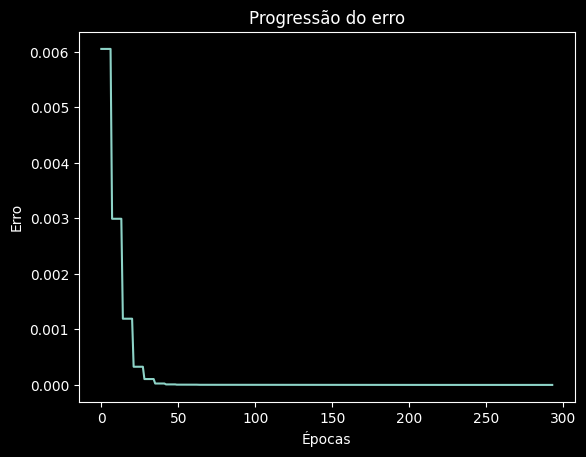

In [22]:
# Visualizando a regressão do erro
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [23]:
# Salvando o modelo
modelo.to_disk('modelo')

### Etapa 6 Teste com uma frase

In [24]:
# Carregando o modelo
modelo_carregado = spacy.load('modelo')
modelo_carregado

In [25]:
# Frases
texto_positivo = "Eu adoro  cor dos seus olhos"

In [26]:
# Fazendo o processamento da frase
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor olho'

In [27]:
# Fazendo a previsão
previssao = modelo_carregado(texto_positivo)
previssao

adorar cor olho

In [28]:
# Visualizando a previsão
previssao.cats

{'ALEGRIA': 0.9554942846298218, 'MEDO': 0.020603135228157043}

In [29]:
# Testando frase negativa
frase_negativa = "eu vou te mata"
frase_negativa = preprocessamento(frase_negativa)
frase_negativa

'matar'

In [30]:
# Previsão
previssao = modelo_carregado(frase_negativa)
previssao.cats

{'ALEGRIA': 0.12317860871553421, 'MEDO': 0.771622896194458}

### Avaliação na Base de Treinamento

In [31]:
# Toda a base
previsoes = []
for texto in bd['texto']:
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

previsoes

[{'ALEGRIA': 0.9943835735321045, 'MEDO': 0.0006202993681654334},
 {'ALEGRIA': 0.9939696788787842, 'MEDO': 0.001753408694639802},
 {'ALEGRIA': 0.9908792972564697, 'MEDO': 0.001235814532265067},
 {'ALEGRIA': 0.9935763478279114, 'MEDO': 0.0014563152799382806},
 {'ALEGRIA': 0.9992089867591858, 'MEDO': 0.0005686070653609931},
 {'ALEGRIA': 0.9979557991027832, 'MEDO': 0.0008748301770538092},
 {'ALEGRIA': 0.996273398399353, 'MEDO': 0.001116137602366507},
 {'ALEGRIA': 0.9981252551078796, 'MEDO': 0.001551570137962699},
 {'ALEGRIA': 0.9913185834884644, 'MEDO': 0.0011279897298663855},
 {'ALEGRIA': 0.9922345876693726, 'MEDO': 0.002718942705541849},
 {'ALEGRIA': 0.9978551268577576, 'MEDO': 0.000630359398201108},
 {'ALEGRIA': 0.998918890953064, 'MEDO': 0.0008052863413468003},
 {'ALEGRIA': 0.9969839453697205, 'MEDO': 0.0008860652451403439},
 {'ALEGRIA': 0.9975020289421082, 'MEDO': 0.0005024243728257716},
 {'ALEGRIA': 0.985461950302124, 'MEDO': 0.004896394908428192},
 {'ALEGRIA': 0.9989778995513916, 'M

In [32]:
# Convertendo para array
previsoes_final = []
for previsao in previsoes:
    if previsao['ALEGRIA'] > previsao['MEDO']:
        previsoes_final.append('alegria')
    else:
        previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [33]:
# convertendo a base de dados
respostas_reais = bd['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [34]:
# Visualizando a taxa de acerto 
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(respostas_reais, previsoes_final)

1.0

In [35]:
# Matrix de confusão
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]], dtype=int64)